In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
df = read_csv('/Users/lilysunilkarmakar/Downloads/diabetes.csv')
# Dataframe is created 
df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age','Outcome']]
# vectorized
df = pd.get_dummies(df)
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [3]:
#flot to int
df['BMI'] = df['BMI'].astype('int64')
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].astype('int64')
print(df.dtypes)

Pregnancies                 int64
Glucose                     int64
BloodPressure               int64
SkinThickness               int64
BMI                         int64
DiabetesPedigreeFunction    int64
Age                         int64
Outcome                     int64
dtype: object


In [4]:
len(df)
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#drop the nan 
df = df.dropna()
df.isna().sum()
len(df)

768

In [6]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
print(x)
print(y)
from sklearn.preprocessing import normalize
df = normalize(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  BMI  \
0              6      148             72             35   33   
1              1       85             66             29   26   
2              8      183             64              0   23   
3              1       89             66             23   28   
4              0      137             40             35   43   
..           ...      ...            ...            ...  ...   
763           10      101             76             48   32   
764            2      122             70             27   36   
765            5      121             72             23   26   
766            1      126             60              0   30   
767            1       93             70             31   30   

     DiabetesPedigreeFunction  Age  
0                           0   50  
1                           0   31  
2                           0   32  
3                           0   21  
4                           2   33  
..       

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [15.0, 15.0, 40.0, 40.0],
  [115.0, 115.0, 125.0, 125.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [192.5, 192.5, 223.75, 223.75],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [275.0, 275.0, 301.25, 301.25],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [360.0, 360.0, 382.5, 382.5],
  [345.0, 345.0, 371.25, 371.25],
  [335.0, 335.0, 358.125, 358.125],
  [415.0, 415.0, 425.0, 425.0],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [435.0, 435.0, 452.5, 452.5],
  [420.0, 420.0, 443.75, 443.75],
  [405.0, 405.0, 431.875, 431.875],
  [346.5625, 346.5625, 418.437

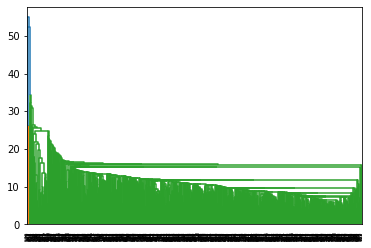

In [7]:
#plot a dendrogram for the hierarchical clustering methods
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
# compute the a hierarchical clustering
Z = linkage(x, method='single')
# plot the resulting tree
dendrogram(Z)

In [8]:
#use MDS or PCA to reduce the dimension 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
X_pca = pca.transform(x)

In [9]:
#choose a value of k s 
#Perform k-means clustering on this 2-dim data (We will choose a random number of clusters, say 2)
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

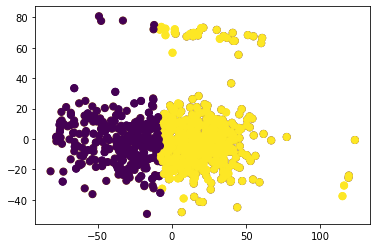

In [10]:
#scatterplot the result with colors indicating the clusters.
#comparing the scatter plot of this 2-dim data 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')